#### Full Feed-Forward Neural Network

A Feed-Forward (Neural) Network (FFN) is essentially a simple neural network where the connections between nodes do not form a cycle. That is to say that there are no backlinks or connection from the $L+1$ layer to the $L$ layer as would be seen in Residual Networks

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

In [2]:
# Device configuration to use GPU if found
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
# Define hyperparameters
input_size = 784 # Images are 28x28 = 784 pixels each
hidden_size = 100 # Number of neurons in the hidden layer
num_classes = 10 # 10 classes or digits to be predicted
num_epochs = 2 # 2 epochs
batch_size = 100 # 100 samples per batch
alpha = 1e-3 # Learning rate = 0.001

In [4]:
# Import MNIST dataset
# This dataset contains images of the handwritten numbers 0-9
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)

In [5]:
# Initialize train DataLoader
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
# Check one sample
sample = iter(train_dataloader).next()
print(sample)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
# sample = sample[1]
# # sample = sample.view(sample.shape[0], 28*28)
# print(sample.shape)

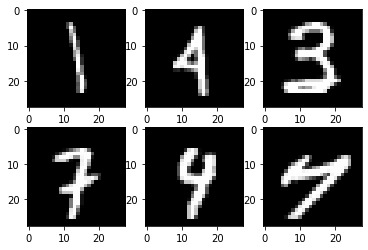

In [8]:
# Display the first few samples in images
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample[0][i][0], cmap='gray')
plt.show()

In [9]:
# Create FFN
class FFN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFN, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        return (self.l2(self.relu(self.l1(x))))
        # We are not using any softmax layer or one-hot encoding the output since we are going to be using CrossEntropyLoss

In [10]:
# Define model
model = FFN(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes).to(device) # The model has to be pushed to the device as well

# Define criterion
criterion = nn.CrossEntropyLoss() # This is a multiclass classification problem

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=alpha) # The Adam optimizer will be used here

In [11]:
# Training loop
num_iters = len(train_dataloader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # images are of the shape 100, 1, 28, 28
        # There are 100 images per batch
        # Each image has 1 channel (grayscale) and 28x28 pixels
        # The required format is 100, 784
        # 100 samples each with 784 features (pixel values)
        images = images.view(images.shape[0], 28*28).to(device) # Reshape the tensor and push it to device
        labels = labels.to(device) # Also push labels to device
        
        # Forward propagation
        predicted_output = model(images)
        
        # Loss
        loss = criterion(predicted_output, labels)
        
        # Backprop
        loss.backward()
        
        # Parameter update
        optimizer.step()
        
        # Zero out gradients
        optimizer.zero_grad()
        
        # Print some information
        if (i+1) % 100 == 0:
            print(f"Epoch: {epoch+1}/{num_epochs}, step: {i+1}/{num_iters}, loss: {loss.item():.3f}")

Epoch: 1/2, step: 100/600, loss: 0.389
Epoch: 1/2, step: 200/600, loss: 0.350
Epoch: 1/2, step: 300/600, loss: 0.240
Epoch: 1/2, step: 400/600, loss: 0.269
Epoch: 1/2, step: 500/600, loss: 0.144
Epoch: 1/2, step: 600/600, loss: 0.150
Epoch: 2/2, step: 100/600, loss: 0.172
Epoch: 2/2, step: 200/600, loss: 0.294
Epoch: 2/2, step: 300/600, loss: 0.219
Epoch: 2/2, step: 400/600, loss: 0.163
Epoch: 2/2, step: 500/600, loss: 0.154
Epoch: 2/2, step: 600/600, loss: 0.176


In [12]:
# Testing and evaluation
with torch.no_grad():
    samples = 0
    correct = 0
    for i, (images, labels) in enumerate(test_dataloader):
        # images are of the shape 100, 1, 28, 28
        # There are 100 images per batch
        # Each image has 1 channel (grayscale) and 28x28 pixels
        # The required format is 100, 784
        # 100 samples each with 784 features (pixel values)
        images = images.view(images.shape[0], 28*28).to(device) # Reshape the tensor and push it to device
        labels = labels.to(device) # Also push labels to device
        
        # Forward propagation
        predicted_output = model(images)
        _, predicted_output = torch.max(predicted_output, 1) # Acquire the class label
        
        # Overall loss
        samples += labels.shape[0] # Number of labelled samples received
        correct += (predicted_output==labels).sum().item() # Number of correctly predicted samples
    
    acc = correct / samples * 100.0
    print(f"Accuracy: {acc:.3f}")

Accuracy: 95.570
